In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import keras_tuner
from keras_tuner.tuners import RandomSearch

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

train_data.shape, test_data.shape

((42000, 785), (28000, 784))

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.isnull().sum().sum(), test_data.isnull().sum().sum()

(0, 0)

In [5]:
train_data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

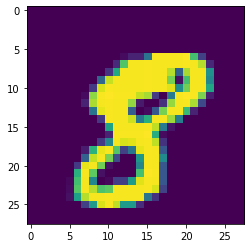

In [6]:
plt.imshow(np.array(train_data.iloc[10, 1:]).reshape(28, 28))

In [7]:
X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

X.shape, y.shape

((42000, 784), (42000,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [9]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
X_train.shape, X_test.shape

((31500, 28, 28, 1), (10500, 28, 28, 1))

In [11]:
# def build_model(hp):
#     inputs = tf.keras.Input(shape=(28, 28, 1))
#     x = inputs
#     for i in range(hp.Int("conv_layers", 1, 10, default=3)):
#         x = tf.keras.layers.Conv2D(
#             filters=hp.Int("filters_" + str(i), 4, 32, step=4),
#             kernel_size=hp.Int("kernel_size_" + str(i), 3, 5),
#             activation="relu",
#             padding="same"
#         )(x)

#         if hp.Choice("pooling" + str(i), ["max", "avg"]) == "max":
#             x = tf.keras.layers.MaxPooling2D()(x)
#         else:
#             x = tf.keras.layers.AveragePooling2D()(x)

#         x = tf.keras.layers.BatchNormalization()(x)
#         x = tf.keras.layers.ReLU()(x)

#     if hp.Choice("global_pooling", ["max", "avg"]) == "max":
#         x = tf.keras.layers.GlobalMaxPooling2D()(x)
#     else:
#         x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
#     outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
#     model = tf.keras.Model(inputs, outputs)

#     model.compile(
#         optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
#     )
#     return model

In [12]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=20, 
                              kernel_size=4, 
                              input_shape=(28, 28, 1), 
                              activation="relu", 
                              padding="same"))

model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Conv2D(filters=8, 
                              kernel_size=3,                            
                              activation="relu", 
                              padding="same"))

model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(filters=24, 
                              kernel_size=5,
                              activation="relu", 
                              padding="same"))

model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

2022-07-31 12:16:15.310332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:16:15.423079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:16:15.423944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


2022-07-31 12:16:15.425871: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-31 12:16:15.426173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:16:15.427141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 12:16:15.428024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        340       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1448      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 24)          4824      
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 24)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 24)                0

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Best_Model.h5", save_best_only=True)

In [15]:
model_history = model.fit(X_train, y_train, epochs = 100, 
                          validation_data=(X_test, y_test), 
                          callbacks=[checkpoint_cb])

2022-07-31 12:16:18.415185: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-31 12:16:19.776075: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/985 [..............................] - ETA: 1:56:14 - loss: 16.5122 - accuracy: 0.1562

 16/985 [..............................] - ETA: 3s - loss: 5.5016 - accuracy: 0.1387      

 31/985 [..............................] - ETA: 3s - loss: 4.0132 - accuracy: 0.1371

 46/985 [>.............................] - ETA: 3s - loss: 3.4590 - accuracy: 0.1379

 62/985 [>.............................] - ETA: 3s - loss: 3.1545 - accuracy: 0.1426

 78/985 [=>............................] - ETA: 3s - loss: 2.9616 - accuracy: 0.1595

 93/985 [=>............................] - ETA: 3s - loss: 2.8384 - accuracy: 0.1657

100/985 [==>...........................] - ETA: 3s - loss: 2.7889 - accuracy: 0.1747

108/985 [==>...........................] - ETA: 3s - loss: 2.7399 - accuracy: 0.1803

118/985 [==>...........................] - ETA: 3s - loss: 2.6786 - accuracy: 0.1936

129/985 [==>...........................] - ETA: 3s - loss: 2.6203 - accuracy: 0.2054

140/985 [===>..........................] - ETA: 3s - loss: 2.5633 - accuracy: 0.2163

153/985 [===>..........................] - ETA: 3s - loss: 2.4867 - accuracy: 0.2371

164/985 [===>..........................] - ETA: 3s - loss: 2.4081 - accuracy: 0.2624

174/985 [====>.........................] - ETA: 3s - loss: 2.3344 - accuracy: 0.2863

184/985 [====>.........................] - ETA: 3s - loss: 2.2608 - accuracy: 0.3074

194/985 [====>.........................] - ETA: 3s - loss: 2.1914 - accuracy: 0.3276

204/985 [=====>........................] - ETA: 3s - loss: 2.1233 - accuracy: 0.3480

216/985 [=====>........................] - ETA: 3s - loss: 2.0440 - accuracy: 0.3727

232/985 [======>.......................] - ETA: 3s - loss: 1.9512 - accuracy: 0.4010

248/985 [======>.......................] - ETA: 3s - loss: 1.8616 - accuracy: 0.4286

264/985 [=======>......................] - ETA: 3s - loss: 1.7812 - accuracy: 0.4531

280/985 [=======>......................] - ETA: 2s - loss: 1.7061 - accuracy: 0.4765

296/985 [========>.....................] - ETA: 2s - loss: 1.6426 - accuracy: 0.4956

312/985 [========>.....................] - ETA: 2s - loss: 1.5785 - accuracy: 0.5155

328/985 [========>.....................] - ETA: 2s - loss: 1.5217 - accuracy: 0.5326

344/985 [=========>....................] - ETA: 2s - loss: 1.4687 - accuracy: 0.5486

361/985 [=========>....................] - ETA: 2s - loss: 1.4181 - accuracy: 0.5640

377/985 [==========>...................] - ETA: 2s - loss: 1.3766 - accuracy: 0.5760

393/985 [==========>...................] - ETA: 2s - loss: 1.3331 - accuracy: 0.5893

409/985 [===========>..................] - ETA: 2s - loss: 1.2919 - accuracy: 0.6022

425/985 [===========>..................] - ETA: 2s - loss: 1.2556 - accuracy: 0.6132

441/985 [============>.................] - ETA: 2s - loss: 1.2212 - accuracy: 0.6234

457/985 [============>.................] - ETA: 2s - loss: 1.1905 - accuracy: 0.6329

472/985 [=============>................] - ETA: 1s - loss: 1.1616 - accuracy: 0.6418

488/985 [=============>................] - ETA: 1s - loss: 1.1362 - accuracy: 0.6497

504/985 [==============>...............] - ETA: 1s - loss: 1.1117 - accuracy: 0.6573

519/985 [==============>...............] - ETA: 1s - loss: 1.0902 - accuracy: 0.6639

534/985 [===============>..............] - ETA: 1s - loss: 1.0685 - accuracy: 0.6708

550/985 [===============>..............] - ETA: 1s - loss: 1.0455 - accuracy: 0.6777

566/985 [================>.............] - ETA: 1s - loss: 1.0227 - accuracy: 0.6846

582/985 [================>.............] - ETA: 1s - loss: 1.0012 - accuracy: 0.6910

598/985 [=================>............] - ETA: 1s - loss: 0.9800 - accuracy: 0.6974

614/985 [=================>............] - ETA: 1s - loss: 0.9617 - accuracy: 0.7027

630/985 [==================>...........] - ETA: 1s - loss: 0.9445 - accuracy: 0.7081

646/985 [==================>...........] - ETA: 1s - loss: 0.9277 - accuracy: 0.7132

662/985 [===================>..........] - ETA: 1s - loss: 0.9111 - accuracy: 0.7182

678/985 [===================>..........] - ETA: 1s - loss: 0.8954 - accuracy: 0.7231

694/985 [====================>.........] - ETA: 1s - loss: 0.8797 - accuracy: 0.7278

710/985 [====================>.........] - ETA: 0s - loss: 0.8649 - accuracy: 0.7321

726/985 [=====================>........] - ETA: 0s - loss: 0.8500 - accuracy: 0.7369

742/985 [=====================>........] - ETA: 0s - loss: 0.8360 - accuracy: 0.7409

759/985 [======================>.......] - ETA: 0s - loss: 0.8222 - accuracy: 0.7452

775/985 [======================>.......] - ETA: 0s - loss: 0.8100 - accuracy: 0.7489

791/985 [=======================>......] - ETA: 0s - loss: 0.7987 - accuracy: 0.7524

807/985 [=======================>......] - ETA: 0s - loss: 0.7868 - accuracy: 0.7561

824/985 [========================>.....] - ETA: 0s - loss: 0.7750 - accuracy: 0.7597

840/985 [========================>.....] - ETA: 0s - loss: 0.7639 - accuracy: 0.7633

857/985 [=========================>....] - ETA: 0s - loss: 0.7528 - accuracy: 0.7667

873/985 [=========================>....] - ETA: 0s - loss: 0.7423 - accuracy: 0.7699

890/985 [==========================>...] - ETA: 0s - loss: 0.7309 - accuracy: 0.7736

907/985 [==========================>...] - ETA: 0s - loss: 0.7210 - accuracy: 0.7767

924/985 [===========================>..] - ETA: 0s - loss: 0.7112 - accuracy: 0.7801

940/985 [===========================>..] - ETA: 0s - loss: 0.7031 - accuracy: 0.7829

956/985 [============================>.] - ETA: 0s - loss: 0.6941 - accuracy: 0.7858

972/985 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.7886

985/985 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7905

985/985 [==============================] - 11s 4ms/step - loss: 0.6791 - accuracy: 0.7905 - val_loss: 0.1970 - val_accuracy: 0.9419


Epoch 2/100
  1/985 [..............................] - ETA: 3s - loss: 0.1405 - accuracy: 0.9688

 16/985 [..............................] - ETA: 3s - loss: 0.1739 - accuracy: 0.9492

 32/985 [..............................] - ETA: 3s - loss: 0.1501 - accuracy: 0.9561

 48/985 [>.............................] - ETA: 3s - loss: 0.1821 - accuracy: 0.9479

 64/985 [>.............................] - ETA: 2s - loss: 0.1632 - accuracy: 0.9512

 81/985 [=>............................] - ETA: 2s - loss: 0.1579 - accuracy: 0.9541

 98/985 [=>............................] - ETA: 2s - loss: 0.1673 - accuracy: 0.9528

114/985 [==>...........................] - ETA: 2s - loss: 0.1720 - accuracy: 0.9504

131/985 [==>...........................] - ETA: 2s - loss: 0.1721 - accuracy: 0.9487

148/985 [===>..........................] - ETA: 2s - loss: 0.1712 - accuracy: 0.9495

164/985 [===>..........................] - ETA: 2s - loss: 0.1723 - accuracy: 0.9501

180/985 [====>.........................] - ETA: 2s - loss: 0.1742 - accuracy: 0.9495

196/985 [====>.........................] - ETA: 2s - loss: 0.1728 - accuracy: 0.9499

211/985 [=====>........................] - ETA: 2s - loss: 0.1720 - accuracy: 0.9499

227/985 [=====>........................] - ETA: 2s - loss: 0.1707 - accuracy: 0.9495

243/985 [======>.......................] - ETA: 2s - loss: 0.1687 - accuracy: 0.9504

259/985 [======>.......................] - ETA: 2s - loss: 0.1692 - accuracy: 0.9502

275/985 [=======>......................] - ETA: 2s - loss: 0.1694 - accuracy: 0.9498

290/985 [=======>......................] - ETA: 2s - loss: 0.1694 - accuracy: 0.9496

306/985 [========>.....................] - ETA: 2s - loss: 0.1687 - accuracy: 0.9498

322/985 [========>.....................] - ETA: 2s - loss: 0.1679 - accuracy: 0.9500

337/985 [=========>....................] - ETA: 2s - loss: 0.1657 - accuracy: 0.9503

353/985 [=========>....................] - ETA: 2s - loss: 0.1653 - accuracy: 0.9502

369/985 [==========>...................] - ETA: 1s - loss: 0.1643 - accuracy: 0.9506

385/985 [==========>...................] - ETA: 1s - loss: 0.1637 - accuracy: 0.9506

401/985 [===========>..................] - ETA: 1s - loss: 0.1651 - accuracy: 0.9504

417/985 [===========>..................] - ETA: 1s - loss: 0.1638 - accuracy: 0.9505

433/985 [============>.................] - ETA: 1s - loss: 0.1634 - accuracy: 0.9509

448/985 [============>.................] - ETA: 1s - loss: 0.1637 - accuracy: 0.9508

463/985 [=============>................] - ETA: 1s - loss: 0.1629 - accuracy: 0.9509

479/985 [=============>................] - ETA: 1s - loss: 0.1634 - accuracy: 0.9511

495/985 [==============>...............] - ETA: 1s - loss: 0.1620 - accuracy: 0.9514

511/985 [==============>...............] - ETA: 1s - loss: 0.1601 - accuracy: 0.9521

527/985 [===============>..............] - ETA: 1s - loss: 0.1616 - accuracy: 0.9515

543/985 [===============>..............] - ETA: 1s - loss: 0.1621 - accuracy: 0.9511

559/985 [================>.............] - ETA: 1s - loss: 0.1614 - accuracy: 0.9514

575/985 [================>.............] - ETA: 1s - loss: 0.1614 - accuracy: 0.9513

588/985 [================>.............] - ETA: 1s - loss: 0.1598 - accuracy: 0.9518

603/985 [=================>............] - ETA: 1s - loss: 0.1581 - accuracy: 0.9523

618/985 [=================>............] - ETA: 1s - loss: 0.1590 - accuracy: 0.9522

633/985 [==================>...........] - ETA: 1s - loss: 0.1580 - accuracy: 0.9524

649/985 [==================>...........] - ETA: 1s - loss: 0.1564 - accuracy: 0.9529

665/985 [===================>..........] - ETA: 1s - loss: 0.1560 - accuracy: 0.9531

681/985 [===================>..........] - ETA: 0s - loss: 0.1546 - accuracy: 0.9535

697/985 [====================>.........] - ETA: 0s - loss: 0.1539 - accuracy: 0.9537

711/985 [====================>.........] - ETA: 0s - loss: 0.1534 - accuracy: 0.9540

726/985 [=====================>........] - ETA: 0s - loss: 0.1528 - accuracy: 0.9542

742/985 [=====================>........] - ETA: 0s - loss: 0.1520 - accuracy: 0.9545

758/985 [======================>.......] - ETA: 0s - loss: 0.1506 - accuracy: 0.9550

774/985 [======================>.......] - ETA: 0s - loss: 0.1510 - accuracy: 0.9548

790/985 [=======================>......] - ETA: 0s - loss: 0.1499 - accuracy: 0.9550

805/985 [=======================>......] - ETA: 0s - loss: 0.1494 - accuracy: 0.9554

820/985 [=======================>......] - ETA: 0s - loss: 0.1492 - accuracy: 0.9556

836/985 [========================>.....] - ETA: 0s - loss: 0.1491 - accuracy: 0.9554

852/985 [========================>.....] - ETA: 0s - loss: 0.1489 - accuracy: 0.9553

867/985 [=========================>....] - ETA: 0s - loss: 0.1482 - accuracy: 0.9555

882/985 [=========================>....] - ETA: 0s - loss: 0.1484 - accuracy: 0.9554

898/985 [==========================>...] - ETA: 0s - loss: 0.1472 - accuracy: 0.9557

914/985 [==========================>...] - ETA: 0s - loss: 0.1460 - accuracy: 0.9560

930/985 [===========================>..] - ETA: 0s - loss: 0.1450 - accuracy: 0.9563

946/985 [===========================>..] - ETA: 0s - loss: 0.1444 - accuracy: 0.9565

962/985 [============================>.] - ETA: 0s - loss: 0.1437 - accuracy: 0.9568

978/985 [============================>.] - ETA: 0s - loss: 0.1432 - accuracy: 0.9571

985/985 [==============================] - 4s 4ms/step - loss: 0.1428 - accuracy: 0.9573 - val_loss: 0.1210 - val_accuracy: 0.9649


Epoch 3/100
  1/985 [..............................] - ETA: 4s - loss: 0.1390 - accuracy: 0.9375

 17/985 [..............................] - ETA: 3s - loss: 0.0991 - accuracy: 0.9669

 32/985 [..............................] - ETA: 3s - loss: 0.1060 - accuracy: 0.9668

 48/985 [>.............................] - ETA: 3s - loss: 0.0991 - accuracy: 0.9688

 64/985 [>.............................] - ETA: 2s - loss: 0.0985 - accuracy: 0.9692

 80/985 [=>............................] - ETA: 2s - loss: 0.1122 - accuracy: 0.9656

 96/985 [=>............................] - ETA: 2s - loss: 0.1111 - accuracy: 0.9668

112/985 [==>...........................] - ETA: 2s - loss: 0.1102 - accuracy: 0.9668

128/985 [==>...........................] - ETA: 2s - loss: 0.1067 - accuracy: 0.9675

144/985 [===>..........................] - ETA: 2s - loss: 0.1034 - accuracy: 0.9685

160/985 [===>..........................] - ETA: 2s - loss: 0.1060 - accuracy: 0.9668

176/985 [====>.........................] - ETA: 2s - loss: 0.1037 - accuracy: 0.9670

191/985 [====>.........................] - ETA: 2s - loss: 0.1056 - accuracy: 0.9663

206/985 [=====>........................] - ETA: 2s - loss: 0.1056 - accuracy: 0.9662

221/985 [=====>........................] - ETA: 2s - loss: 0.1033 - accuracy: 0.9669

236/985 [======>.......................] - ETA: 2s - loss: 0.1022 - accuracy: 0.9680

251/985 [======>.......................] - ETA: 2s - loss: 0.1007 - accuracy: 0.9683

267/985 [=======>......................] - ETA: 2s - loss: 0.1023 - accuracy: 0.9677

283/985 [=======>......................] - ETA: 2s - loss: 0.1012 - accuracy: 0.9684

298/985 [========>.....................] - ETA: 2s - loss: 0.1001 - accuracy: 0.9685

314/985 [========>.....................] - ETA: 2s - loss: 0.0994 - accuracy: 0.9688

330/985 [=========>....................] - ETA: 2s - loss: 0.0987 - accuracy: 0.9690

345/985 [=========>....................] - ETA: 2s - loss: 0.0995 - accuracy: 0.9688

361/985 [=========>....................] - ETA: 2s - loss: 0.1004 - accuracy: 0.9686

376/985 [==========>...................] - ETA: 2s - loss: 0.1010 - accuracy: 0.9683

392/985 [==========>...................] - ETA: 1s - loss: 0.1004 - accuracy: 0.9684

408/985 [===========>..................] - ETA: 1s - loss: 0.0999 - accuracy: 0.9687

424/985 [===========>..................] - ETA: 1s - loss: 0.0995 - accuracy: 0.9688

439/985 [============>.................] - ETA: 1s - loss: 0.0983 - accuracy: 0.9691

455/985 [============>.................] - ETA: 1s - loss: 0.0995 - accuracy: 0.9688

471/985 [=============>................] - ETA: 1s - loss: 0.1006 - accuracy: 0.9688

486/985 [=============>................] - ETA: 1s - loss: 0.1015 - accuracy: 0.9682

501/985 [==============>...............] - ETA: 1s - loss: 0.1018 - accuracy: 0.9683

517/985 [==============>...............] - ETA: 1s - loss: 0.1016 - accuracy: 0.9680

533/985 [===============>..............] - ETA: 1s - loss: 0.1012 - accuracy: 0.9680

548/985 [===============>..............] - ETA: 1s - loss: 0.1007 - accuracy: 0.9681

563/985 [================>.............] - ETA: 1s - loss: 0.1004 - accuracy: 0.9683

578/985 [================>.............] - ETA: 1s - loss: 0.1001 - accuracy: 0.9683

594/985 [=================>............] - ETA: 1s - loss: 0.1000 - accuracy: 0.9682

609/985 [=================>............] - ETA: 1s - loss: 0.0995 - accuracy: 0.9684

624/985 [==================>...........] - ETA: 1s - loss: 0.0990 - accuracy: 0.9683

637/985 [==================>...........] - ETA: 1s - loss: 0.0983 - accuracy: 0.9688

651/985 [==================>...........] - ETA: 1s - loss: 0.0986 - accuracy: 0.9687

667/985 [===================>..........] - ETA: 1s - loss: 0.0986 - accuracy: 0.9686

682/985 [===================>..........] - ETA: 1s - loss: 0.0979 - accuracy: 0.9690

697/985 [====================>.........] - ETA: 0s - loss: 0.0973 - accuracy: 0.9690

713/985 [====================>.........] - ETA: 0s - loss: 0.0978 - accuracy: 0.9689

729/985 [=====================>........] - ETA: 0s - loss: 0.0969 - accuracy: 0.9691

745/985 [=====================>........] - ETA: 0s - loss: 0.0978 - accuracy: 0.9689

761/985 [======================>.......] - ETA: 0s - loss: 0.0984 - accuracy: 0.9688

777/985 [======================>.......] - ETA: 0s - loss: 0.0975 - accuracy: 0.9690

793/985 [=======================>......] - ETA: 0s - loss: 0.0974 - accuracy: 0.9691

810/985 [=======================>......] - ETA: 0s - loss: 0.0969 - accuracy: 0.9694

826/985 [========================>.....] - ETA: 0s - loss: 0.0970 - accuracy: 0.9692

842/985 [========================>.....] - ETA: 0s - loss: 0.0977 - accuracy: 0.9692

859/985 [=========================>....] - ETA: 0s - loss: 0.0973 - accuracy: 0.9692

875/985 [=========================>....] - ETA: 0s - loss: 0.0975 - accuracy: 0.9691

891/985 [==========================>...] - ETA: 0s - loss: 0.0979 - accuracy: 0.9690

908/985 [==========================>...] - ETA: 0s - loss: 0.0978 - accuracy: 0.9691

924/985 [===========================>..] - ETA: 0s - loss: 0.0969 - accuracy: 0.9695

938/985 [===========================>..] - ETA: 0s - loss: 0.0969 - accuracy: 0.9696

946/985 [===========================>..] - ETA: 0s - loss: 0.0970 - accuracy: 0.9695

953/985 [============================>.] - ETA: 0s - loss: 0.0973 - accuracy: 0.9696

960/985 [============================>.] - ETA: 0s - loss: 0.0972 - accuracy: 0.9696

969/985 [============================>.] - ETA: 0s - loss: 0.0970 - accuracy: 0.9697

978/985 [============================>.] - ETA: 0s - loss: 0.0979 - accuracy: 0.9695

985/985 [==============================] - 5s 5ms/step - loss: 0.0976 - accuracy: 0.9696 - val_loss: 0.0952 - val_accuracy: 0.9697


Epoch 4/100
  1/985 [..............................] - ETA: 6s - loss: 0.0312 - accuracy: 1.0000

 11/985 [..............................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9858

 21/985 [..............................] - ETA: 4s - loss: 0.0677 - accuracy: 0.9836

 31/985 [..............................] - ETA: 4s - loss: 0.0824 - accuracy: 0.9778

 42/985 [>.............................] - ETA: 4s - loss: 0.0962 - accuracy: 0.9717

 52/985 [>.............................] - ETA: 4s - loss: 0.0882 - accuracy: 0.9718

 62/985 [>.............................] - ETA: 4s - loss: 0.0847 - accuracy: 0.9733

 72/985 [=>............................] - ETA: 4s - loss: 0.0878 - accuracy: 0.9722

 83/985 [=>............................] - ETA: 4s - loss: 0.0870 - accuracy: 0.9729

 93/985 [=>............................] - ETA: 4s - loss: 0.0844 - accuracy: 0.9741

103/985 [==>...........................] - ETA: 4s - loss: 0.0854 - accuracy: 0.9742

113/985 [==>...........................] - ETA: 4s - loss: 0.0839 - accuracy: 0.9746

127/985 [==>...........................] - ETA: 4s - loss: 0.0859 - accuracy: 0.9727

143/985 [===>..........................] - ETA: 3s - loss: 0.0843 - accuracy: 0.9729

159/985 [===>..........................] - ETA: 3s - loss: 0.0846 - accuracy: 0.9721

175/985 [====>.........................] - ETA: 3s - loss: 0.0823 - accuracy: 0.9732

191/985 [====>.........................] - ETA: 3s - loss: 0.0829 - accuracy: 0.9735

207/985 [=====>........................] - ETA: 3s - loss: 0.0825 - accuracy: 0.9734

223/985 [=====>........................] - ETA: 3s - loss: 0.0826 - accuracy: 0.9730

238/985 [======>.......................] - ETA: 3s - loss: 0.0805 - accuracy: 0.9737

255/985 [======>.......................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9750

272/985 [=======>......................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9748

289/985 [=======>......................] - ETA: 2s - loss: 0.0784 - accuracy: 0.9748

305/985 [========>.....................] - ETA: 2s - loss: 0.0777 - accuracy: 0.9750

321/985 [========>.....................] - ETA: 2s - loss: 0.0767 - accuracy: 0.9755

338/985 [=========>....................] - ETA: 2s - loss: 0.0782 - accuracy: 0.9753

354/985 [=========>....................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9750

370/985 [==========>...................] - ETA: 2s - loss: 0.0793 - accuracy: 0.9750

386/985 [==========>...................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9750

402/985 [===========>..................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9751

418/985 [===========>..................] - ETA: 2s - loss: 0.0784 - accuracy: 0.9750

434/985 [============>.................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9749

450/985 [============>.................] - ETA: 1s - loss: 0.0793 - accuracy: 0.9747

466/985 [=============>................] - ETA: 1s - loss: 0.0791 - accuracy: 0.9748

480/985 [=============>................] - ETA: 1s - loss: 0.0801 - accuracy: 0.9744

495/985 [==============>...............] - ETA: 1s - loss: 0.0802 - accuracy: 0.9745

511/985 [==============>...............] - ETA: 1s - loss: 0.0804 - accuracy: 0.9744

527/985 [===============>..............] - ETA: 1s - loss: 0.0798 - accuracy: 0.9746

543/985 [===============>..............] - ETA: 1s - loss: 0.0795 - accuracy: 0.9747

559/985 [================>.............] - ETA: 1s - loss: 0.0788 - accuracy: 0.9750

574/985 [================>.............] - ETA: 1s - loss: 0.0793 - accuracy: 0.9749

590/985 [================>.............] - ETA: 1s - loss: 0.0797 - accuracy: 0.9748

606/985 [=================>............] - ETA: 1s - loss: 0.0788 - accuracy: 0.9750

621/985 [=================>............] - ETA: 1s - loss: 0.0780 - accuracy: 0.9752

636/985 [==================>...........] - ETA: 1s - loss: 0.0776 - accuracy: 0.9754

651/985 [==================>...........] - ETA: 1s - loss: 0.0774 - accuracy: 0.9755

667/985 [===================>..........] - ETA: 1s - loss: 0.0770 - accuracy: 0.9756

683/985 [===================>..........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9757

699/985 [====================>.........] - ETA: 1s - loss: 0.0773 - accuracy: 0.9757

715/985 [====================>.........] - ETA: 0s - loss: 0.0780 - accuracy: 0.9755

731/985 [=====================>........] - ETA: 0s - loss: 0.0795 - accuracy: 0.9751

747/985 [=====================>........] - ETA: 0s - loss: 0.0798 - accuracy: 0.9751

763/985 [======================>.......] - ETA: 0s - loss: 0.0803 - accuracy: 0.9747

779/985 [======================>.......] - ETA: 0s - loss: 0.0801 - accuracy: 0.9747

795/985 [=======================>......] - ETA: 0s - loss: 0.0795 - accuracy: 0.9748

811/985 [=======================>......] - ETA: 0s - loss: 0.0797 - accuracy: 0.9749

827/985 [========================>.....] - ETA: 0s - loss: 0.0801 - accuracy: 0.9746

843/985 [========================>.....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9747

859/985 [=========================>....] - ETA: 0s - loss: 0.0794 - accuracy: 0.9750

875/985 [=========================>....] - ETA: 0s - loss: 0.0797 - accuracy: 0.9749

891/985 [==========================>...] - ETA: 0s - loss: 0.0799 - accuracy: 0.9749

906/985 [==========================>...] - ETA: 0s - loss: 0.0800 - accuracy: 0.9747

921/985 [===========================>..] - ETA: 0s - loss: 0.0800 - accuracy: 0.9747

936/985 [===========================>..] - ETA: 0s - loss: 0.0798 - accuracy: 0.9748

952/985 [===========================>..] - ETA: 0s - loss: 0.0802 - accuracy: 0.9747

964/985 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9746

976/985 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9747

985/985 [==============================] - 4s 4ms/step - loss: 0.0798 - accuracy: 0.9748 - val_loss: 0.0752 - val_accuracy: 0.9770


Epoch 5/100
  1/985 [..............................] - ETA: 3s - loss: 0.1058 - accuracy: 0.9688

 17/985 [..............................] - ETA: 3s - loss: 0.0931 - accuracy: 0.9798

 33/985 [>.............................] - ETA: 3s - loss: 0.0638 - accuracy: 0.9848

 50/985 [>.............................] - ETA: 2s - loss: 0.0698 - accuracy: 0.9812

 66/985 [=>............................] - ETA: 2s - loss: 0.0652 - accuracy: 0.9815

 82/985 [=>............................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9809

 99/985 [==>...........................] - ETA: 2s - loss: 0.0612 - accuracy: 0.9817

115/985 [==>...........................] - ETA: 2s - loss: 0.0579 - accuracy: 0.9829

131/985 [==>...........................] - ETA: 2s - loss: 0.0587 - accuracy: 0.9821

147/985 [===>..........................] - ETA: 2s - loss: 0.0607 - accuracy: 0.9813

163/985 [===>..........................] - ETA: 2s - loss: 0.0623 - accuracy: 0.9808

179/985 [====>.........................] - ETA: 2s - loss: 0.0604 - accuracy: 0.9815

195/985 [====>.........................] - ETA: 2s - loss: 0.0602 - accuracy: 0.9812

211/985 [=====>........................] - ETA: 2s - loss: 0.0597 - accuracy: 0.9812

227/985 [=====>........................] - ETA: 2s - loss: 0.0604 - accuracy: 0.9809

244/985 [======>.......................] - ETA: 2s - loss: 0.0624 - accuracy: 0.9804

260/985 [======>.......................] - ETA: 2s - loss: 0.0631 - accuracy: 0.9804

276/985 [=======>......................] - ETA: 2s - loss: 0.0649 - accuracy: 0.9797

292/985 [=======>......................] - ETA: 2s - loss: 0.0645 - accuracy: 0.9801

308/985 [========>.....................] - ETA: 2s - loss: 0.0643 - accuracy: 0.9802

324/985 [========>.....................] - ETA: 2s - loss: 0.0645 - accuracy: 0.9801

340/985 [=========>....................] - ETA: 2s - loss: 0.0648 - accuracy: 0.9794

356/985 [=========>....................] - ETA: 1s - loss: 0.0657 - accuracy: 0.9793

372/985 [==========>...................] - ETA: 1s - loss: 0.0656 - accuracy: 0.9793

388/985 [==========>...................] - ETA: 1s - loss: 0.0655 - accuracy: 0.9791

404/985 [===========>..................] - ETA: 1s - loss: 0.0653 - accuracy: 0.9789

420/985 [===========>..................] - ETA: 1s - loss: 0.0649 - accuracy: 0.9791

436/985 [============>.................] - ETA: 1s - loss: 0.0645 - accuracy: 0.9791

452/985 [============>.................] - ETA: 1s - loss: 0.0648 - accuracy: 0.9791

468/985 [=============>................] - ETA: 1s - loss: 0.0643 - accuracy: 0.9790

483/985 [=============>................] - ETA: 1s - loss: 0.0640 - accuracy: 0.9790

499/985 [==============>...............] - ETA: 1s - loss: 0.0637 - accuracy: 0.9791

515/985 [==============>...............] - ETA: 1s - loss: 0.0644 - accuracy: 0.9789

531/985 [===============>..............] - ETA: 1s - loss: 0.0644 - accuracy: 0.9788

547/985 [===============>..............] - ETA: 1s - loss: 0.0640 - accuracy: 0.9789

564/985 [================>.............] - ETA: 1s - loss: 0.0634 - accuracy: 0.9792

580/985 [================>.............] - ETA: 1s - loss: 0.0632 - accuracy: 0.9791

595/985 [=================>............] - ETA: 1s - loss: 0.0629 - accuracy: 0.9790

611/985 [=================>............] - ETA: 1s - loss: 0.0624 - accuracy: 0.9793

627/985 [==================>...........] - ETA: 1s - loss: 0.0623 - accuracy: 0.9793

643/985 [==================>...........] - ETA: 1s - loss: 0.0615 - accuracy: 0.9795

659/985 [===================>..........] - ETA: 1s - loss: 0.0618 - accuracy: 0.9793

675/985 [===================>..........] - ETA: 0s - loss: 0.0619 - accuracy: 0.9793

691/985 [====================>.........] - ETA: 0s - loss: 0.0635 - accuracy: 0.9787

706/985 [====================>.........] - ETA: 0s - loss: 0.0641 - accuracy: 0.9785

722/985 [====================>.........] - ETA: 0s - loss: 0.0639 - accuracy: 0.9785

738/985 [=====================>........] - ETA: 0s - loss: 0.0635 - accuracy: 0.9786

754/985 [=====================>........] - ETA: 0s - loss: 0.0636 - accuracy: 0.9786

771/985 [======================>.......] - ETA: 0s - loss: 0.0637 - accuracy: 0.9787

787/985 [======================>.......] - ETA: 0s - loss: 0.0637 - accuracy: 0.9789

803/985 [=======================>......] - ETA: 0s - loss: 0.0635 - accuracy: 0.9789

820/985 [=======================>......] - ETA: 0s - loss: 0.0641 - accuracy: 0.9789

837/985 [========================>.....] - ETA: 0s - loss: 0.0645 - accuracy: 0.9788

854/985 [=========================>....] - ETA: 0s - loss: 0.0642 - accuracy: 0.9790

870/985 [=========================>....] - ETA: 0s - loss: 0.0641 - accuracy: 0.9791

887/985 [==========================>...] - ETA: 0s - loss: 0.0639 - accuracy: 0.9791

903/985 [==========================>...] - ETA: 0s - loss: 0.0645 - accuracy: 0.9789

919/985 [==========================>...] - ETA: 0s - loss: 0.0651 - accuracy: 0.9787

935/985 [===========================>..] - ETA: 0s - loss: 0.0648 - accuracy: 0.9789

952/985 [===========================>..] - ETA: 0s - loss: 0.0648 - accuracy: 0.9788

968/985 [============================>.] - ETA: 0s - loss: 0.0648 - accuracy: 0.9788

984/985 [============================>.] - ETA: 0s - loss: 0.0646 - accuracy: 0.9789

985/985 [==============================] - 4s 4ms/step - loss: 0.0646 - accuracy: 0.9789 - val_loss: 0.0739 - val_accuracy: 0.9780


Epoch 6/100
  1/985 [..............................] - ETA: 4s - loss: 0.0049 - accuracy: 1.0000

 16/985 [..............................] - ETA: 3s - loss: 0.0403 - accuracy: 0.9902

 32/985 [..............................] - ETA: 3s - loss: 0.0444 - accuracy: 0.9873

 48/985 [>.............................] - ETA: 3s - loss: 0.0459 - accuracy: 0.9850

 65/985 [>.............................] - ETA: 2s - loss: 0.0442 - accuracy: 0.9861

 81/985 [=>............................] - ETA: 2s - loss: 0.0476 - accuracy: 0.9857

 97/985 [=>............................] - ETA: 2s - loss: 0.0478 - accuracy: 0.9861

113/985 [==>...........................] - ETA: 2s - loss: 0.0518 - accuracy: 0.9845

130/985 [==>...........................] - ETA: 2s - loss: 0.0506 - accuracy: 0.9844

145/985 [===>..........................] - ETA: 2s - loss: 0.0516 - accuracy: 0.9847

161/985 [===>..........................] - ETA: 2s - loss: 0.0521 - accuracy: 0.9841

177/985 [====>.........................] - ETA: 2s - loss: 0.0500 - accuracy: 0.9848

193/985 [====>.........................] - ETA: 2s - loss: 0.0504 - accuracy: 0.9846

210/985 [=====>........................] - ETA: 2s - loss: 0.0502 - accuracy: 0.9847

227/985 [=====>........................] - ETA: 2s - loss: 0.0498 - accuracy: 0.9846

244/985 [======>.......................] - ETA: 2s - loss: 0.0513 - accuracy: 0.9842

261/985 [======>.......................] - ETA: 2s - loss: 0.0517 - accuracy: 0.9841

278/985 [=======>......................] - ETA: 2s - loss: 0.0543 - accuracy: 0.9829

295/985 [=======>......................] - ETA: 2s - loss: 0.0552 - accuracy: 0.9824

312/985 [========>.....................] - ETA: 2s - loss: 0.0557 - accuracy: 0.9823

328/985 [========>.....................] - ETA: 2s - loss: 0.0552 - accuracy: 0.9824

344/985 [=========>....................] - ETA: 2s - loss: 0.0586 - accuracy: 0.9814

360/985 [=========>....................] - ETA: 1s - loss: 0.0588 - accuracy: 0.9813

376/985 [==========>...................] - ETA: 1s - loss: 0.0586 - accuracy: 0.9815

392/985 [==========>...................] - ETA: 1s - loss: 0.0573 - accuracy: 0.9819

408/985 [===========>..................] - ETA: 1s - loss: 0.0569 - accuracy: 0.9819

424/985 [===========>..................] - ETA: 1s - loss: 0.0572 - accuracy: 0.9821

441/985 [============>.................] - ETA: 1s - loss: 0.0565 - accuracy: 0.9824

457/985 [============>.................] - ETA: 1s - loss: 0.0559 - accuracy: 0.9825

464/985 [=============>................] - ETA: 1s - loss: 0.0558 - accuracy: 0.9826

In [ ]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

In [ ]:
predictions = model.predict(test_data.values.reshape(-1, 28, 28, 1))
predictions

In [ ]:
predictions.shape

In [ ]:
preds = []
for i in range(28000):
    preds.append(np.argmax(predictions[i]))

In [ ]:
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission["Label"] = preds

In [ ]:
submission.to_csv("submission.csv",index=False)